# NL COVID 19 data exploration

- data from https://data.rivm.nl/covid-19/
- taken 19 July 2020

## Notes

- Given that daily reported numbers are in small quantities
(i.e. <100), changes represented in % changes
can be highly sensitive.
E.g. Changing from 1 to 5 is a 500% change.
- But % change is the only way to
compare change in qty across different slices
of data.
- So take those figures with a pinch of salt.
- That being said, we are looking for anomalies,
so a sufficiently large % change would signal
an abnormally large change.
- (Also, because I've just slapped this together in a
few hours + re-learning how to use pandas/matplotlib,
so i haven't put together a way to quickly
compare % change across many more slices of data -- see todo)

## todo

- helper functions to dry code
- plot graph that shows week-on-week daily % increase
- plot that graph for every week since beginning of data

In [111]:
import pandas as pd
import os
from matplotlib.pyplot import grid,plot, xticks,yticks,legend
import numpy as np

_DATADIR="../_data"

# There are two datasets
# _DATA_CASES is a CSV file containing data on nationally reported cases
# _DATA_CUMUL contains data on cumulative infections, hospitalizations, deaths
#_DATA_CASES="COVID-19_casus_landelijk.csv"
_DATA_CUMUL="COVID-19_aantallen_gemeente_cumulatief-2020-07-21.csv"

#cases = pd.read_csv(os.path.join(_DATADIR, _DATA_CASES), delimiter=";")
cumul = pd.read_csv(os.path.join(_DATADIR, _DATA_CUMUL), delimiter=";")

# set dtype of "Date_of_report" to pd.DatetimeTZDtype
# get date in YYYY-MM-DD by accessing
# cumul_ams["Date_of_report"].dt.date
cumul["Date_of_report"] = pd.to_datetime(cumul["Date_of_report"])
cumul.info()

cumul["Date_of_report"] = cumul["Date_of_report"].dt.normalize() # get date portion of datetime only
cumul["Date_of_report"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48077 entries, 0 to 48076
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_of_report      48077 non-null  datetime64[ns]
 1   Municipality_code   46505 non-null  object        
 2   Municipality_name   46505 non-null  object        
 3   Province            48077 non-null  object        
 4   Total_reported      48077 non-null  int64         
 5   Hospital_admission  48077 non-null  int64         
 6   Deceased            48077 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.6+ MB


0       2020-03-13
1       2020-03-13
2       2020-03-13
3       2020-03-13
4       2020-03-13
           ...    
48072   2020-07-21
48073   2020-07-21
48074   2020-07-21
48075   2020-07-21
48076   2020-07-21
Name: Date_of_report, Length: 48077, dtype: datetime64[ns]

In [112]:
# NOT USED YET
#cases_ams = cases[cases["Municipal_health_service"].isin(["GGD Amsterdam"])]
#cases_ams.tail()

We want only cases from Amsterdam:

In [113]:
cumul_ams = cumul[cumul["Municipality_name"].isin(["Amsterdam"])]

In [114]:
# create new column for day of week
cumul_ams.insert(len(cumul_ams.columns), "Day",cumul_ams["Date_of_report"].dt.day_name())
cumul_ams["Day"].astype("str")


109        Friday
476      Saturday
843        Sunday
1210       Monday
1577      Tuesday
           ...   
46351      Friday
46718    Saturday
47085      Sunday
47452      Monday
47819     Tuesday
Name: Day, Length: 131, dtype: object

In [115]:
# create working df with only 3 cols:
# date, cumulative reports, day of week

cumuldf = cumul_ams[["Date_of_report","Day","Total_reported"]]
cumuldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 109 to 47819
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date_of_report  131 non-null    datetime64[ns]
 1   Day             131 non-null    object        
 2   Total_reported  131 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.1+ KB


## Cumulative reported cases for the last 30 days

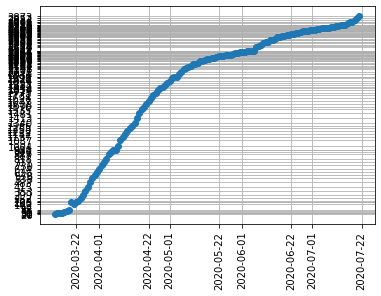

In [129]:
# figure for last 30 days
cumul_ams_dates = cumuldf["Date_of_report"].loc[-30:,]
cumul_ams_reported = cumuldf["Total_reported"].loc[-30:,]

from matplotlib.pyplot import plot_date

grid(True)
xticks(rotation="vertical")
yticks(cumul_ams_reported)
plot_date(cumul_ams_dates, cumul_ams_reported,xdate=True )


In [117]:
# reported figures for each week
cumul_ams_dates_last7 = cumul_ams["Date_of_report"][-7:]
cumul_ams_reported_last7 = cumul_ams["Total_reported"][-7:]
cumul_ams_dates_prev7 = cumul_ams["Date_of_report"][-14:-7]
cumul_ams_reported_prev7 = cumul_ams["Total_reported"][-14:-7]
cumul_ams_dates_3weeks = cumul_ams["Date_of_report"][-21:-14]
cumul_ams_reported_3weeks = cumul_ams["Total_reported"][-21:-14]

# format dates so we can overlay the plots
import datetime

cumul_ams_dates_last7_dt = cumul_ams_dates_last7.dt.date
cumul_ams_dates_prev7_dt = cumul_ams_dates_prev7.dt.date
cumul_ams_dates_3weeks_dt = cumul_ams_dates_3weeks.dt.date

concat_dates = []
for i in range(0,7):
    concat_dates.append(f"{cumul_ams_dates_last7_dt.to_list()[i]}/{cumul_ams_dates_prev7_dt.to_list()[i]}/{cumul_ams_dates_3weeks_dt.to_list()[i]}")

# days = ["Monday","Tuesday","Wednesday","Thursday","Friday", "Saturday", "Sunday"]
cumul_ams_dates_last7_dt

45617    2020-07-15
45984    2020-07-16
46351    2020-07-17
46718    2020-07-18
47085    2020-07-19
47452    2020-07-20
47819    2020-07-21
Name: Date_of_report, dtype: object

## Overlaying reported cases for last 21 days

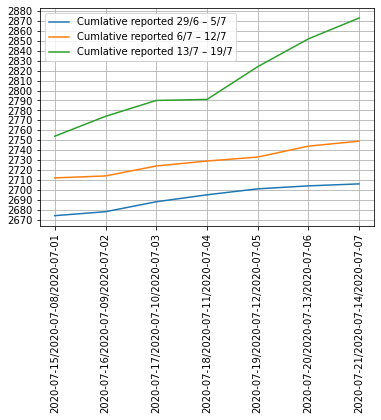

In [118]:
grid(True)
xticks(np.arange(0,7,step=1),rotation="vertical")
yticks(np.arange(1000,2900,step=10))
plot(concat_dates, cumul_ams_reported_3weeks,label="Cumlative reported 29/6 – 5/7")
plot(concat_dates, cumul_ams_reported_prev7, label="Cumlative reported 6/7 – 12/7")
plot(concat_dates, cumul_ams_reported_last7, label="Cumlative reported 13/7 – 19/7")

legend()

Last week's numbers

In [119]:
tmp_df = cumul_ams[["Date_of_report","Total_reported"]]
last7 = tmp_df[-8:]
last7

,Date_of_report,Total_reported
45250,2020-07-14,2749
45617,2020-07-15,2754
45984,2020-07-16,2774
46351,2020-07-17,2790
46718,2020-07-18,2791
47085,2020-07-19,2824
47452,2020-07-20,2852
47819,2020-07-21,2873


In [120]:
last7_reported = last7["Total_reported"].to_list()
last7_daily_incrm = []
for i in range(0,len(last7_reported)):
    if i >0:
        last7_daily_incrm.append(
            last7_reported[i]-last7_reported[i-1]
            )

last7_daily_incrm

[5, 20, 16, 1, 33, 28, 21]

So we can see that last week's numbers:

- Increased from 2744 to 2824 -- +80
-

### Previous week's numbers

In [121]:
tmp_df[-15:-7]

,Date_of_report,Total_reported
42681,2020-07-07,2706
43048,2020-07-08,2712
43415,2020-07-09,2714
43782,2020-07-10,2724
44149,2020-07-11,2729
44516,2020-07-12,2733
44883,2020-07-13,2744
45250,2020-07-14,2749


In [122]:
prev7_reported = tmp_df["Total_reported"][-15:-7].to_list()
prev7_daily_incrm = []
for i in range(0,len(prev7_reported)):
    if i >0:
        prev7_daily_incrm.append(
            prev7_reported[i]-prev7_reported[i-1]
            )

prev7_daily_incrm

[6, 2, 10, 5, 4, 11, 5]

In [123]:
last3weeks = tmp_df[-22:-14]

last3weeks_reported = last3weeks["Total_reported"].to_list()
last3weeks_daily_incrm = []
for i in range(0,len(last3weeks_reported)):
    if i >0:
        last3weeks_daily_incrm.append(
            last3weeks_reported[i]-last3weeks_reported[i-1]
            )

last3weeks_daily_incrm

[3, 4, 10, 7, 6, 3, 2]

### Daily increase in cases, week on week:

In [124]:
week_on_week_incrm_percent = []
for i in range(0,len(prev7_daily_incrm)):
    week_on_week_incrm_percent.append(
        last7_daily_incrm[i]/prev7_daily_incrm[i]*100
    )

week_on_week_incrm_percent

[83.33333333333334, 1000.0, 160.0, 20.0, 825.0, 254.54545454545453, 420.0]

### 3 weeks ago vs last week

In [125]:
week_on_week_incrm_percent_3weeks = []
for i in range(0,len(prev7_daily_incrm)):
    week_on_week_incrm_percent_3weeks.append(
        prev7_daily_incrm[i]/last3weeks_daily_incrm[i]*100
    )

week_on_week_incrm_percent_3weeks

[200.0,
 50.0,
 100.0,
 71.42857142857143,
 66.66666666666666,
 366.66666666666663,
 250.0]

### Plot daily increase for 3 weeks

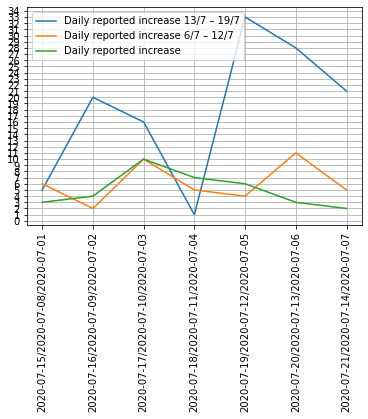

In [126]:
grid()
xticks(np.arange(0,7,step=1),rotation="vertical")
yticks(np.arange(0,40,step=1))
plot(concat_dates,last7_daily_incrm,label="Daily reported increase 13/7 – 19/7")
plot(concat_dates,prev7_daily_incrm,label="Daily reported increase 6/7 – 12/7")
plot(concat_dates,last3weeks_daily_incrm, label="Daily reported increase ")
legend()

### Total reported cases increase, week on week:

In [127]:
sum(last7_daily_incrm)/sum(prev7_daily_incrm)*100

288.3720930232558

In [128]:
sum(prev7_daily_incrm)/sum(last3weeks_daily_incrm)*100

122.85714285714286